In [19]:
from pyeto import fao
import numpy as np
import pandas as pd
import math
import glob

path = "CSV/Lysimeter10_Weather/"
sample_time = "60min"

li = []
li.append(pd.read_csv(path + "Lysimeter10_AirTemp.csv"))
li.append(pd.read_csv(path + "Lysimeter10_Net_radiation.csv"))
li.append(pd.read_csv(path + "Lysimeter10_Rainfall.csv"))
li.append(pd.read_csv(path + "Lysimeter10_Relative_Humidity.csv"))
li.append(pd.read_csv(path + "Lysimeter10_Wind_Speed.csv"))

for data in li:
    data.set_index('time', inplace = True)
    data.index = pd.to_datetime(data.index)
    

li[0] = li[0].resample(sample_time).mean() # Air Temp
li[1] = li[1].resample(sample_time).mean() # Net Radiation
li[2] = li[2].resample(sample_time).sum() # Rainfall
li[3] = li[3].resample(sample_time).mean() # Relative Humidity
li[4] = li[4].resample(sample_time).mean() # Wind Speed


weather = li[0]

#merge all weather into single data-frame
for x in range(len(li) - 1):
    weather = weather.join(li[x + 1], how = 'outer')
    




                           Lysimeter10_AirTemp  Lysimeter10_Net_radiation  \
time                                                                        
2019-01-01 01:00:00+00:00            10.040367                 -44.070378   
2019-01-01 02:00:00+00:00            10.036769                 -73.453604   
2019-01-01 03:00:00+00:00             9.774930                 -66.895053   
2019-01-01 04:00:00+00:00             9.594150                 -50.698713   
2019-01-01 05:00:00+00:00             9.035655                 -51.209641   
...                                        ...                        ...   
2021-05-31 20:00:00+00:00            13.340390                 -66.081537   
2021-05-31 21:00:00+00:00            12.511421                 -68.352848   
2021-05-31 22:00:00+00:00            11.761560                 -68.014019   
2021-05-31 23:00:00+00:00            11.309749                 -70.356255   
2021-06-01 00:00:00+00:00            11.000000                 -71.437200   

<AxesSubplot:xlabel='time'>

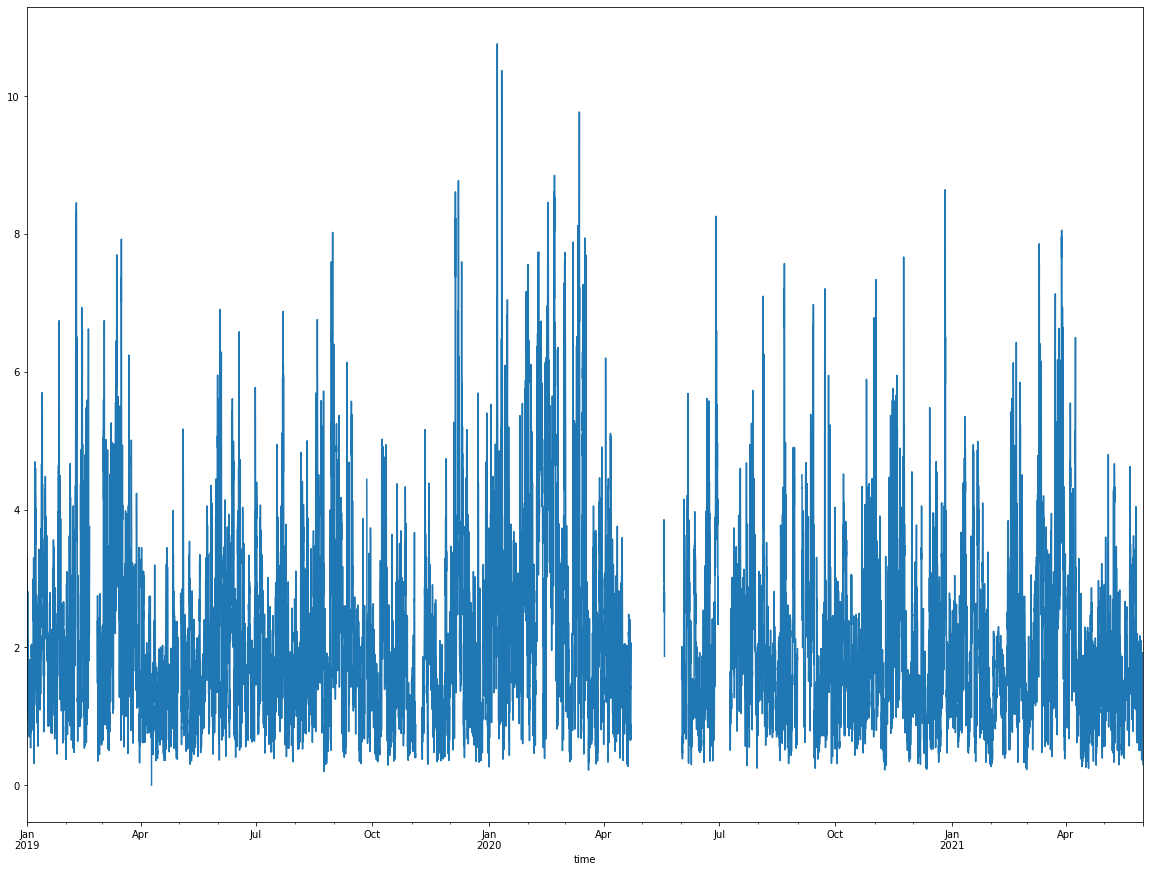

In [32]:
weather['Lysimeter10_Wind_Speed'].plot(figsize = (20,15))

In [2]:
#Resample for min & max daily temp
Daily_minimum_temp = li[0].resample('1D').min()
Daily_maximum_temp = li[0].resample('1D').max()

#Rename to min & max daily Temp
Daily_minimum_temp['Daily_min_temp'] = Daily_minimum_temp['Lysimeter10_AirTemp']
Daily_minimum_temp = Daily_minimum_temp.drop(['Lysimeter10_AirTemp'], axis = 1)
Daily_maximum_temp['Daily_max_temp'] = Daily_maximum_temp['Lysimeter10_AirTemp']
Daily_maximum_temp = Daily_maximum_temp.drop(['Lysimeter10_AirTemp'], axis = 1)

#Merge to single data-frame temp range
Daily_temp_range = Daily_minimum_temp.join(Daily_maximum_temp, how = 'outer')

print(Daily_temp_range)



                           Daily_min_temp  Daily_max_temp
time                                                     
2019-01-01 00:00:00+00:00        4.710864       10.040367
2019-01-02 00:00:00+00:00        0.867409        4.679944
2019-01-03 00:00:00+00:00        0.105866       22.271309
2019-01-04 00:00:00+00:00        3.291365        6.550696
2019-01-05 00:00:00+00:00        3.158774        5.692479
...                                   ...             ...
2021-05-28 00:00:00+00:00        8.269916       19.041944
2021-05-29 00:00:00+00:00        9.276323       18.103343
2021-05-30 00:00:00+00:00        8.561003       17.926184
2021-05-31 00:00:00+00:00        7.347911       17.081337
2021-06-01 00:00:00+00:00       11.000000       11.000000

[883 rows x 2 columns]


In [7]:
#Resample for min & max daily relative humidity
Daily_min_humidity = li[3].resample('1D').min()
Daily_max_humidity = li[3].resample('1D').max()

#rename to min & max daily humidity
Daily_min_humidity['Daily_min_humidity'] = Daily_min_humidity['Lysimeter10_Relative_Humidity']
Daily_min_humidity = Daily_min_humidity.drop(['Lysimeter10_Relative_Humidity'], axis = 1)
Daily_max_humidity['Daily_max_humidity'] = Daily_max_humidity['Lysimeter10_Relative_Humidity']
Daily_max_humidity = Daily_max_humidity.drop(['Lysimeter10_Relative_Humidity'], axis = 1)

#merge to single data-frame humidity range
Daily_humidity_range = Daily_min_humidity.join(Daily_max_humidity, how = 'outer')

print(Daily_humidity_range)

                           Daily_min_humidity  Daily_max_humidity
time                                                             
2019-01-01 00:00:00+00:00           57.606128           85.184958
2019-01-02 00:00:00+00:00           57.984958           69.685794
2019-01-03 00:00:00+00:00           64.044290          357.894429
2019-01-04 00:00:00+00:00           68.196379           78.473816
2019-01-05 00:00:00+00:00           68.981058           79.644011
...                                       ...                 ...
2021-05-28 00:00:00+00:00           44.238611           82.218889
2021-05-29 00:00:00+00:00           54.610864           88.993872
2021-05-30 00:00:00+00:00           46.876880           87.704457
2021-05-31 00:00:00+00:00           55.445125           88.121448
2021-06-01 00:00:00+00:00           76.000000           76.000000

[883 rows x 2 columns]


In [23]:
weather = li[0]

#merge all weather into single data-frame
for x in range(len(li) - 1):
    weather = weather.join(li[x + 1], how = 'outer')

#merge temp range
weather = weather.join(Daily_temp_range, how ='outer')
weather['Daily_min_temp'] = weather['Daily_min_temp'].fillna(method = 'ffill')
weather['Daily_max_temp'] = weather['Daily_max_temp'].fillna(method = 'ffill')

#merge humidity range
weather = weather.join(Daily_humidity_range, how = 'outer')
weather['Daily_min_humidity'] = weather['Daily_min_humidity'].fillna(method = 'ffill')
weather['Daily_max_humidity'] = weather['Daily_max_humidity'].fillna(method = 'ffill')


weather['svp'] = weather['Lysimeter10_AirTemp'].apply(fao.svp_from_t)
weather['svp_tmin'] = weather['Daily_min_temp'].apply(fao.svp_from_t)
weather['svp_tmax'] = weather['Daily_max_temp'].apply(fao.svp_from_t)
weather['delta_svp'] = weather['Lysimeter10_AirTemp'].apply(fao.delta_svp)

weather['avp'] = weather.apply(lambda x: fao.avp_from_rhmin_rhmax(x['svp_tmin'], x['svp_tmax'], x['Daily_min_humidity'], x['Daily_max_humidity']), axis = 1)


newcastle_altitude = 89
newcastle_atm_pressure = fao.atm_pressure(newcastle_altitude)
psy_const = fao.psy_const(newcastle_atm_pressure)


weather['ETo'] = weather.apply(lambda x: fao.fao56_penman_monteith(x['Lysimeter10_Net_radiation'], x['Lysimeter10_AirTemp'], x['Lysimeter10_Wind_Speed'], x['svp'], x['avp'], x['delta_svp'], psy_const, 0.0), axis = 1)


selected = ['ETo', 'RainDiff', 'Lysimeter10_AirTemp', 'Lysimeter10_Net_radiation', 'Lysimeter10_Relative_Humidity', 'Lysimeter10_Wind_Speed', 'Daily_max_temp', 'Daily_min_temp']

weather[selected].to_csv('Water Content Change.csv')
print(weather)
weather.to_csv('weather.csv')



C:\Users\samha\OneDrive\Documents\GitHub\Lysimeter-Digital-Twin\pyeto\fao.py:312: RuntimeWarning: invalid value encountered in double_scalars
  a2 = (900 * ws / t * (svp - avp) * psy /
C:\Users\samha\OneDrive\Documents\GitHub\Lysimeter-Digital-Twin\pyeto\fao.py:312: RuntimeWarning: divide by zero encountered in double_scalars
  a2 = (900 * ws / t * (svp - avp) * psy /


                           Lysimeter10_AirTemp  Lysimeter10_Net_radiation  \
time                                                                        
2019-01-01 00:00:00+00:00                  NaN                        NaN   
2019-01-01 01:00:00+00:00            10.040367                 -44.070378   
2019-01-01 02:00:00+00:00            10.036769                 -73.453604   
2019-01-01 03:00:00+00:00             9.774930                 -66.895053   
2019-01-01 04:00:00+00:00             9.594150                 -50.698713   
...                                        ...                        ...   
2021-05-31 20:00:00+00:00            13.340390                 -66.081537   
2021-05-31 21:00:00+00:00            12.511421                 -68.352848   
2021-05-31 22:00:00+00:00            11.761560                 -68.014019   
2021-05-31 23:00:00+00:00            11.309749                 -70.356255   
2021-06-01 00:00:00+00:00            11.000000                 -71.437200   